In [21]:
import qutip as qt
import numpy as np

# Tracking info of simulations 
import tqdm
import time
import warnings

#Saving data
import pandas as pd
import json
import os

import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.gridspec import GridSpec

In [22]:
import sys
sys.path.append('/Users/omichel/Desktop/qilimanjaro/projects/quantum_transport/quantum_state_transfer/src')

import model_building as md
import Hamiltonian as Ham
import dynamics as dyn
import data_handling as dh
import plots as plots

In [35]:
a = 0.5
b = 0.5
N = 10
lmd = 0.5

#state_dictionary = {"1":1}
state_dictionary = {"1":1, "0":1}
#state_dictionary = {"11":1, "00":1}
#state_dictionary = {"111":1, "000":1}

initial_chain = md.create_standard_state(state_dictionary, 'Alice')
final_chain   = md.create_standard_state(state_dictionary, 'Bob')

initial_state = md.initialize_general_system(N, initial_chain, 'Alice')
target_state  = md.initialize_general_system(N, final_chain, 'Bob')

In [36]:
H = Ham.Hamiltonian(N, 'standard', lmd)

In [37]:
ti = 0
tf = 6.25
Nstep = 5000

fidelity, magnetization, result = dyn.OneStepAlgorithm(initial_state, target_state, H, ti, tf, Nstep, N)

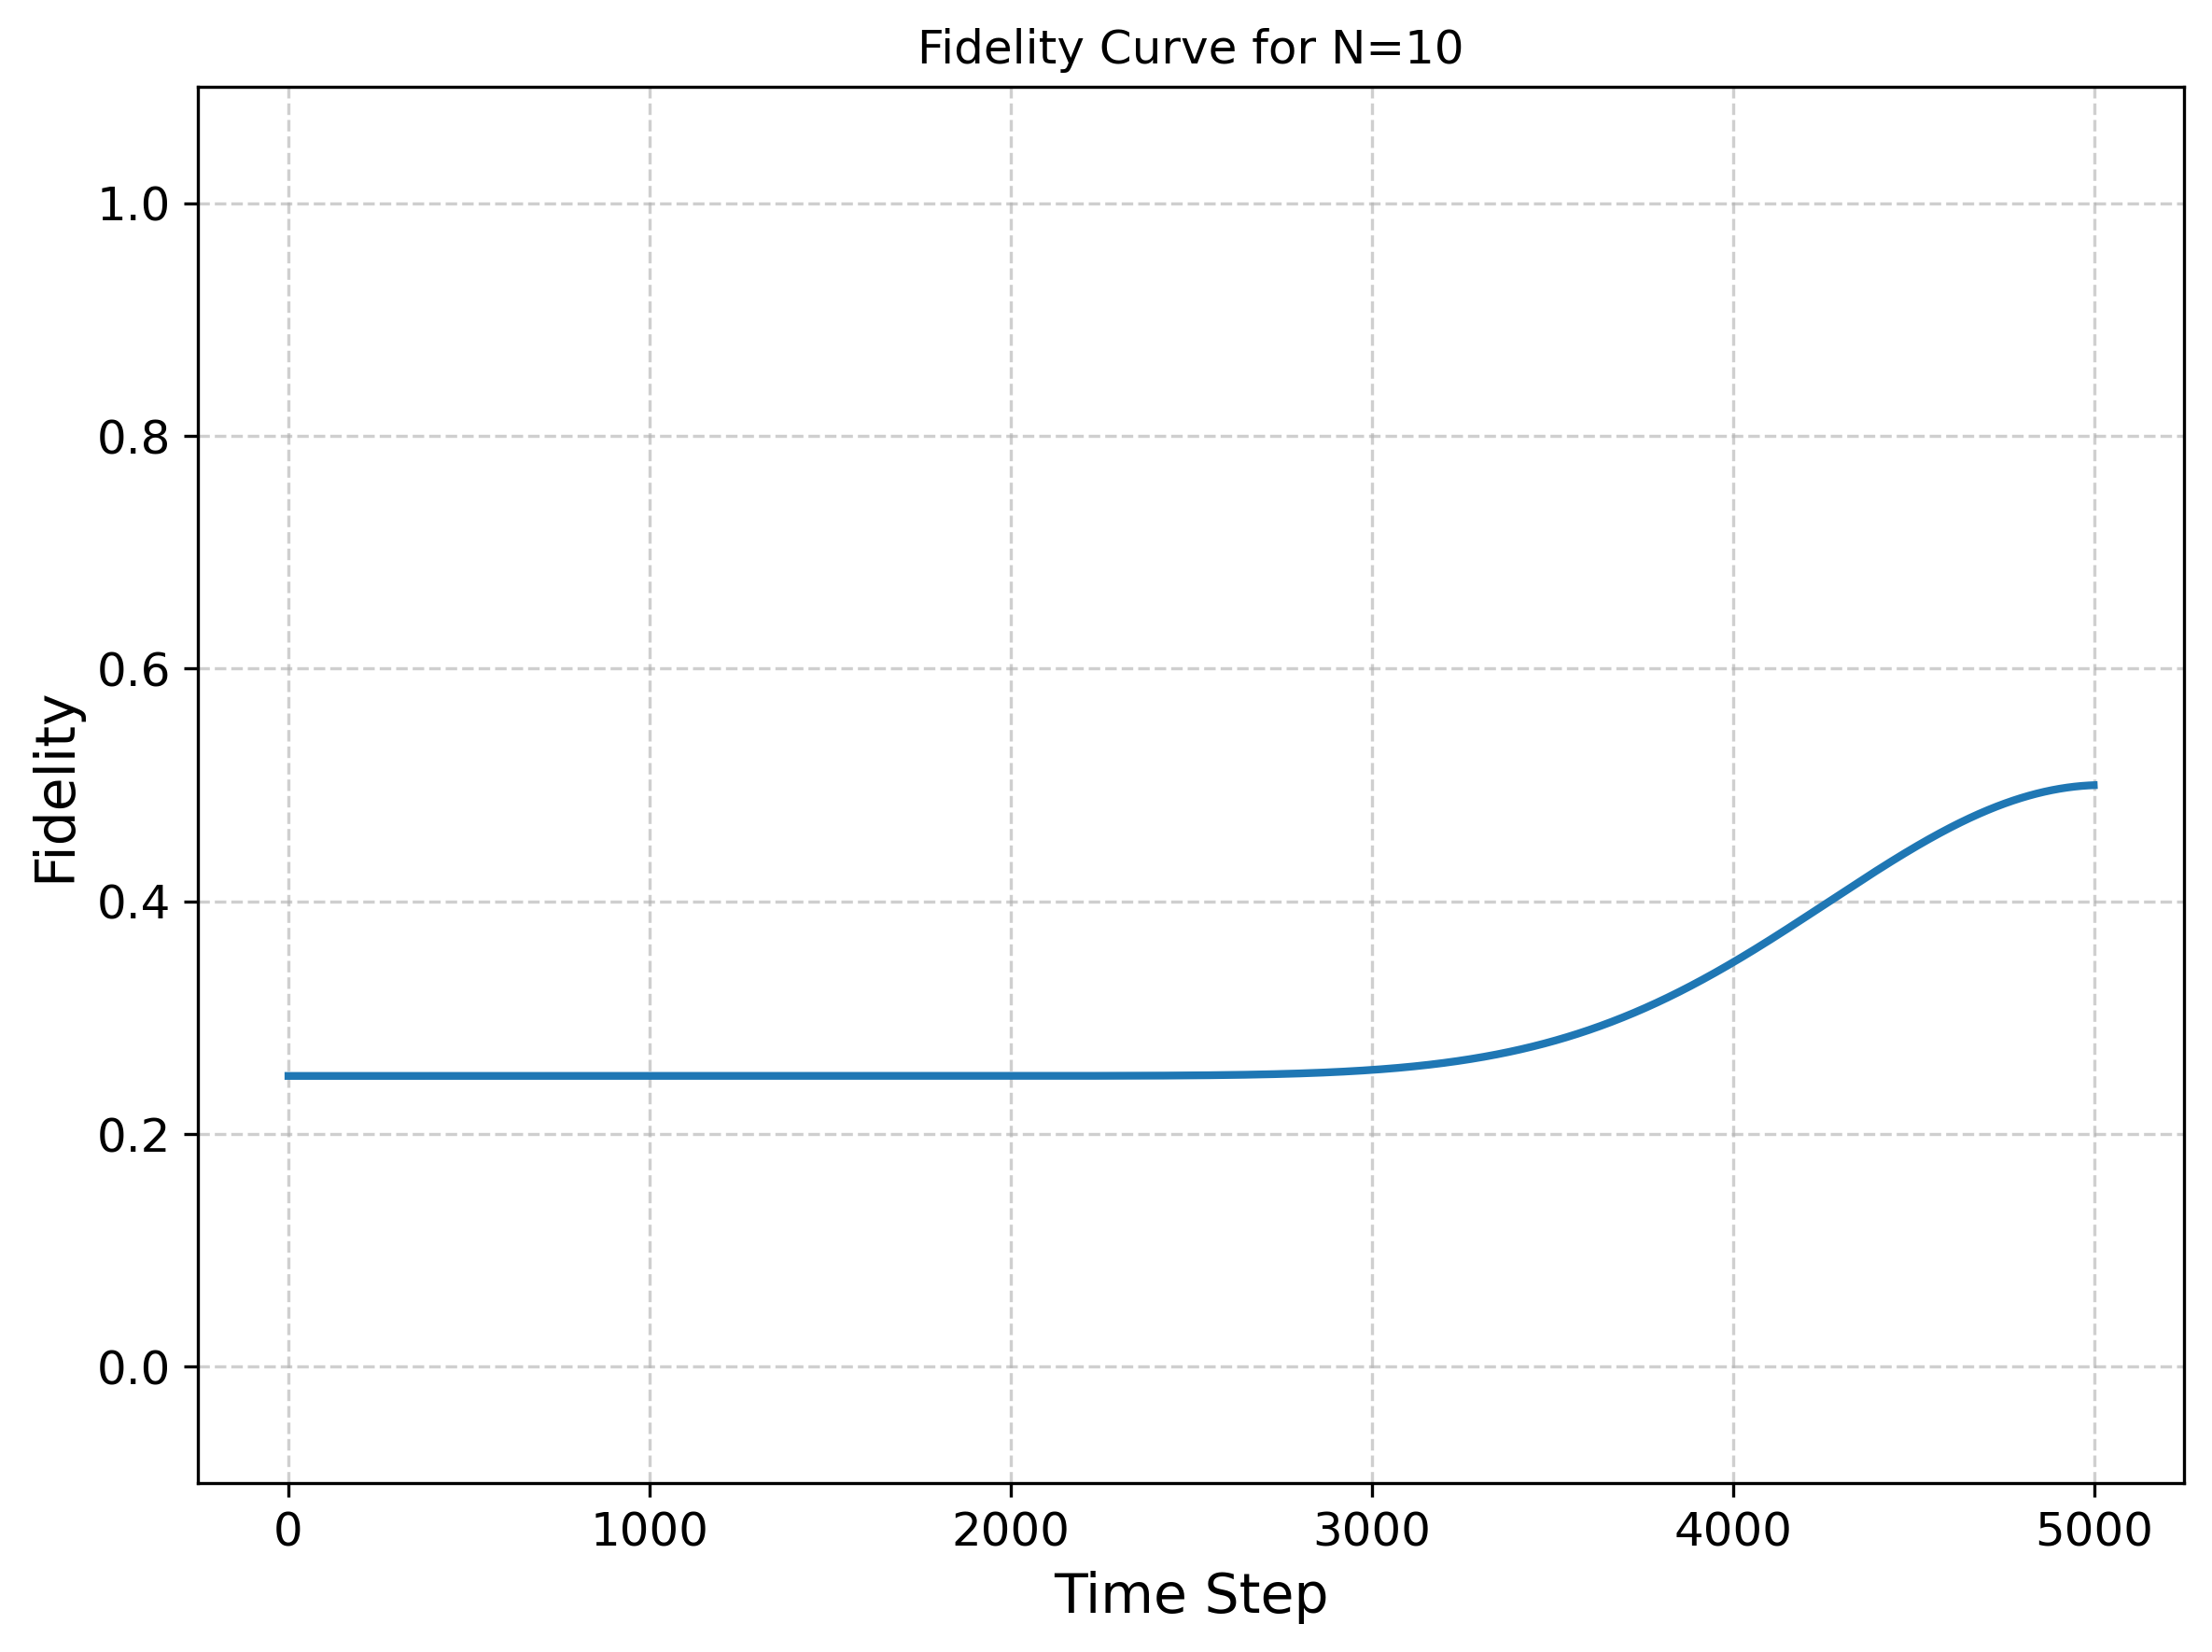

In [38]:
plots.plot_test_fidelity(fidelity, N)

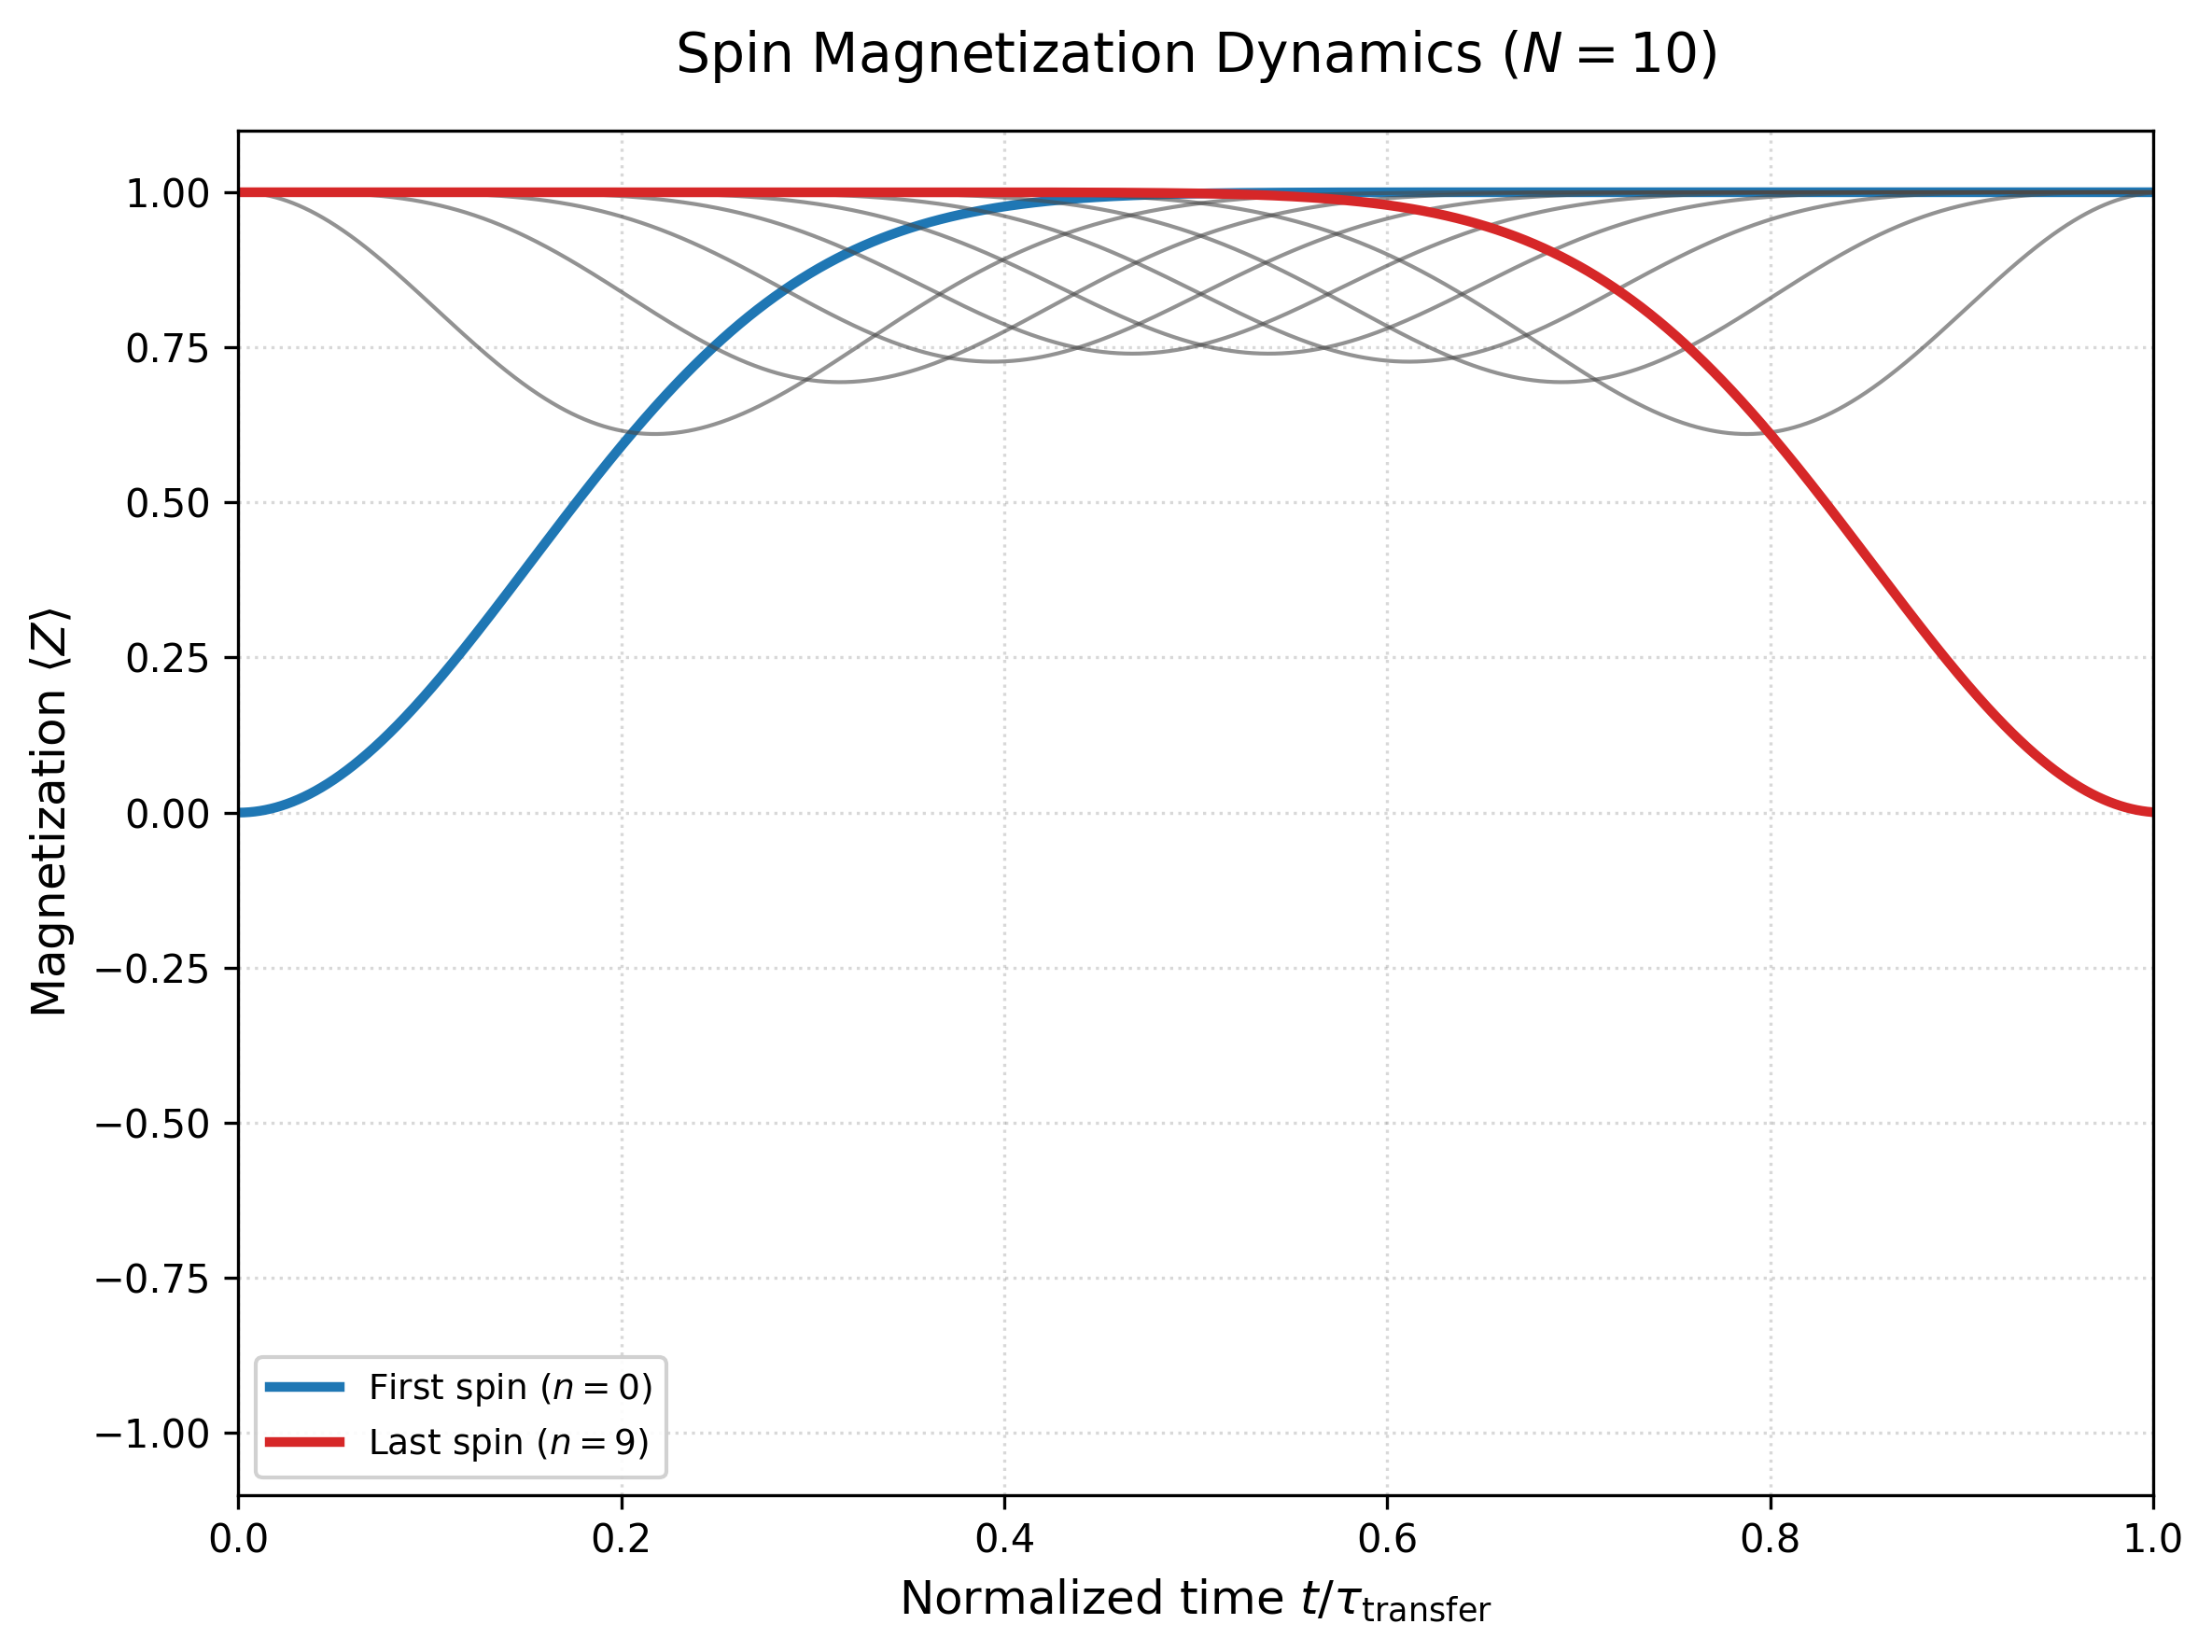

In [39]:
plots.plot_test_z_expectations(magnetization, N)

In [40]:
import pandas as pd

def create_observables_dataframe(state1, state2, H, state1_name="Final", state2_name="Target"):
    """Create a pandas DataFrame for nice tabular output."""
    
    data = []
    obs_dict = {'σx': H.sx_list, 'σy': H.sy_list, 'σz': H.sz_list}
    
    for obs_name, op_list in obs_dict.items():
        for i, op in enumerate(op_list):
            v1 = qt.expect(op, state1)
            v2 = qt.expect(op, state2)
            data.append({
                'Observable': obs_name,
                'Qubit': i,
                state1_name: v1,
                state2_name: v2,
                'Difference': abs(v1 - v2)
            })
    
    df = pd.DataFrame(data)
    return df

# Usage with beautiful printing
df = create_observables_dataframe(result.states[-1], target_state, H)
print(df.to_string(float_format="%.4f", index=False))

Observable  Qubit   Final  Target  Difference
        σx      0 -0.0000  0.0000      0.0000
        σx      1  0.0000  0.0000      0.0000
        σx      2 -0.0000  0.0000      0.0000
        σx      3  0.0000  0.0000      0.0000
        σx      4 -0.0000  0.0000      0.0000
        σx      5  0.0000  0.0000      0.0000
        σx      6 -0.0000  0.0000      0.0000
        σx      7  0.0000  0.0000      0.0000
        σx      8  0.0249  0.0000      0.0249
        σx      9  0.0000  1.0000      1.0000
        σy      0  0.0000  0.0000      0.0000
        σy      1 -0.0000  0.0000      0.0000
        σy      2  0.0000  0.0000      0.0000
        σy      3 -0.0000  0.0000      0.0000
        σy      4  0.0000  0.0000      0.0000
        σy      5  0.0000  0.0000      0.0000
        σy      6  0.0000  0.0000      0.0000
        σy      7  0.0004  0.0000      0.0004
        σy      8  0.0000  0.0000      0.0000
        σy      9 -0.9997  0.0000      0.9997
        σz      0  1.0000  1.0000 

In [29]:
magn_end = np.array([qt.expect(op, result.states[-1]) 
                    for op in H.sx_list])
print(magn_end)

magn_target = np.array([qt.expect(op, target_state) 
                    for op in H.sx_list])
print(magn_target)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
